**Data Prepration and Processing**


In [9]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [13]:
train_samples = []
train_labels = []


Example Dataset Description

Age range: 13 to 100 years

Total participants: 2100

Groups:

Half (1050) were 65 years or older

Half (1050) were under 65 years old

Side effect observation:

95% of patients 65+ experienced side effects

95% of patients under 65 experienced no side effects

In [14]:
for i in range(50):  # 5% of 1000 = 50
    # 5% The of younqer indrvtduals did expertence stde effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)  # side effect  1 is label if they have

    # 5% 'he of older tndivtduols did not expertence stde effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)  # no side effect
    

for i in range(950):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)  # no side effec


    # 95%'he of older individuals *tvo did experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1) 


In [1]:
# for i in train_samples:
#     print(i)


In [2]:
# for i in train_labels:
#     print(i)


In [15]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)


# Shuffle (keeps samples and labels in sync)
train_samples, train_labels = shuffle(train_samples, train_labels)


In [17]:
# Scale ages (13–100 → 0–1 range)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))


# shuffle(train_samples, train_labels) → randomizes data but keeps each sample matched with its label.
# MinMaxScaler(feature_range=(0, 1)) → converts ages from range 13–100 into values between 0 and 1.
# .reshape(-1,1) → reshapes 1D array into 2D (needed for fit_transform).

print("First 10 scaled samples:\n", scaled_train_samples[:10].flatten())
print("First 10 labels:\n", train_labels[:10])

First 10 scaled samples:
 [0.43678161 0.52873563 0.29885057 0.16091954 0.82758621 0.1954023
 0.59770115 0.04597701 0.8045977  0.31034483]
First 10 labels:
 [1 0 0 0 1 0 1 0 1 0]


**We have made dataset, Now we will make a neural network**

In [ ]:
pip install tensorflow


**Simple tf.keras Sequential Model** 

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [19]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available:", len(physical_devices))

# Optional: Enable memory growth for each GPU
if physical_devices:
    try:
        for gpu in physical_devices:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Memory growth enabled for GPUs")
    except RuntimeError as e:
        print(e)

Num GPUs Available: 0


In [23]:
model = Sequential([ #making hidenlayers
    Dense(units=16, input_shape=(1,),activation = 'relu'),
    Dense(units=32, activation ='relu'),
    Dense(units=2, activation ='softmax')
])

Layer-by-Layer Explanation

Sequential([...])
Builds the model layer by layer (data flows straight through).
Dense(units=16, input_shape=(1,), activation='relu')

Dense = Fully connected layer.

units=16 → 16 neurons.

input_shape=(1,) → model expects 1 input feature (e.g., age).

activation='relu' → introduces non-linearity, helps learn patterns.

Dense(units=32, activation='relu')

Hidden layer with 32 neurons.

Uses ReLU activation.

Learns more complex relationships.

Dense(units=2, activation='softmax')

Output layer with 2 neurons (for 2 classes: "side effect" / "no side effect").

softmax converts outputs into probabilities that add up to 1.

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

**Now We have successfully created an Artifical neural network**

**Now we will train our ANN on the data we created earlier**

In [25]:
# 🧠 Model Compilation & Training Explanation


## 🔹 Step 1: Compile the Model

model.compile(
    optimizer=Adam(learning_rate=0.0001),   # How the model learns (very small steps)
    loss='sparse_categorical_crossentropy', # How we measure errors (suited for integer class labels)
    metrics=['accuracy']                    # What to track during training
)

**Explanation:**
optimizer=Adam(...) → Adam is an advanced optimizer that adapts learning rates.
learning_rate=0.0001 → very small learning steps → stable training.
loss='sparse_categorical_crossentropy' → correct for integer labels (0 or 1).
metrics=['accuracy'] → track accuracy while training.

In [27]:
model.fit(
    x=scaled_train_samples,  # Input data (ages scaled 0–1)
    y=train_labels,          # Labels (0 = no side effect, 1 = side effect)
    batch_size=10,           # Process 10 samples at a time before updating weights
    epochs=30,               # Go through the whole dataset 30 times
    shuffle=Tr
    ue,            # Shuffle dataset each epoch (avoid memorization)
    verbose=2                # Show training progress per epoch
)

Epoch 1/30
200/200 - 2s - 9ms/step - accuracy: 0.9290 - loss: 0.2688
Epoch 2/30
200/200 - 0s - 2ms/step - accuracy: 0.9310 - loss: 0.2679
Epoch 3/30
200/200 - 0s - 2ms/step - accuracy: 0.9335 - loss: 0.2670
Epoch 4/30
200/200 - 0s - 2ms/step - accuracy: 0.9315 - loss: 0.2663
Epoch 5/30
200/200 - 0s - 2ms/step - accuracy: 0.9320 - loss: 0.2653
Epoch 6/30
200/200 - 0s - 2ms/step - accuracy: 0.9285 - loss: 0.2644
Epoch 7/30
200/200 - 0s - 2ms/step - accuracy: 0.9355 - loss: 0.2638
Epoch 8/30
200/200 - 0s - 2ms/step - accuracy: 0.9335 - loss: 0.2630
Epoch 9/30
200/200 - 0s - 2ms/step - accuracy: 0.9310 - loss: 0.2623
Epoch 10/30
200/200 - 0s - 2ms/step - accuracy: 0.9335 - loss: 0.2616
Epoch 11/30
200/200 - 0s - 2ms/step - accuracy: 0.9355 - loss: 0.2608
Epoch 12/30
200/200 - 0s - 2ms/step - accuracy: 0.9340 - loss: 0.2604
Epoch 13/30
200/200 - 0s - 2ms/step - accuracy: 0.9340 - loss: 0.2599
Epoch 14/30
200/200 - 0s - 2ms/step - accuracy: 0.9355 - loss: 0.2590
Epoch 15/30
200/200 - 0s - 2m

**Explanation:**
batch_size=10 → update weights after every 10 samples (not after every single one).
epochs=30 → model sees the dataset 30 times.
shuffle=True → prevents model from memorizing sample order.
verbose=2 → prints progress per epoch (clean output).

🔹 **What happens in each epoch?**

Forward pass

The model takes your input (scaled_train_samples), runs it through the layers, and produces predictions.

Loss calculation

It compares predictions with the true labels (train_labels) using your loss function (probably binary crossentropy in this case since labels are 0/1).

Backward pass (backpropagation)

The optimizer (Adam/SGD etc.) adjusts the weights slightly to reduce the loss.

Repeat for all batches

That’s one epoch. At the end of each epoch, the model is usually a bit better at classifying correctly.


# 📊 Understanding Training Output (Loss & Accuracy)

When we run `model.fit()`, Keras shows progress for each **epoch**.  
In your case, you trained for **30 epochs**.


## 🔹 Example Log:
## 🔹 What Each Term Means

- **`Epoch 1/30`** → This is the **1st pass through the entire dataset** (out of 30).  
- **`200/200`** → Your dataset was split into **200 batches** (because you had ~2000 samples and `batch_size=10`).  
- **`2s - 9ms/step`** → Time taken per step (batch).  

---

### ✅ Accuracy
- **`accuracy: 0.9290` (92.9%)** at the first epoch.  
- By the final epoch → **`accuracy: 0.9375` (93.75%)**.  
- This means the model is correctly predicting ~94% of labels.

👉 Accuracy tells us **how many predictions were correct overall**.



### 📉 Loss
- **`loss: 0.2688`** initially.  
- By epoch 30 → **`loss: 0.2516`**.  

👉 **Loss** measures *how far off the predictions are from the true values*.  
  - Lower loss = better model fit.  
  - Unlike accuracy, loss gives finer feedback (even when predictions are close but wrong).  

---

## 🔹 Trend in Your Training
- Accuracy is slowly **increasing** (92.9% → 93.8%).  
- Loss is slowly **decreasing** (0.268 → 0.251).  
- This means the model is **learning steadily**, though improvements are small because the dataset is simple and accuracy is already quite high.  

---

✅ **In short:**  
- **Accuracy ↑** → Model is getting more correct predictions.  
- **Loss ↓** → Model’s predictions are getting closer to true values.  
- Training looks stable (no overfitting signs yet).

---


**Now ww will validate our model and will first make a validation set by using keras**

***👉 Keras will:***

Take 10% of your training data (x and y)
Hold it out (not used in training/weight updates)
Use it for validation after each epoch.

---
***Where is validation data stored?***

It comes directly from your training data (scaled_train_samples and train_labels).
Internally, Keras splits it before training begins:
90% → Training set
10% → Validation set
⚠️ Important: The split is taken from the end of the data array (so usually shuffle your dataset before calling fit).

---

**🔹 How validation is done**

After each epoch, the model:
Trains on the 90% training data
*Tests its performance (loss + accuracy) on the 10% validation data*
Validation results are *printed alongside training metrics.*

In [26]:
model.fit(
    x=scaled_train_samples,  # Input data (ages scaled 0–1)
    y=train_labels,          # Labels (0 = no side effect, 1 = side effect)
    validation_split = 0.1,    # 10% now is reselrved for validation, not used in training
    batch_size=10,           # Process 10 samples at a time before updating weights
    epochs=30,               # Go through the whole dataset 30 times
    shuffle=True,            # Shuffle dataset each epoch (avoid memorization)
    verbose=2                # Show training progress per epoch
)

Epoch 1/30
180/180 - 2s - 13ms/step - accuracy: 0.5533 - loss: 0.6599 - val_accuracy: 0.5350 - val_loss: 0.6577
Epoch 2/30
180/180 - 0s - 2ms/step - accuracy: 0.6194 - loss: 0.6352 - val_accuracy: 0.6200 - val_loss: 0.6370
Epoch 3/30
180/180 - 0s - 2ms/step - accuracy: 0.6889 - loss: 0.6097 - val_accuracy: 0.6650 - val_loss: 0.6144
Epoch 4/30
180/180 - 0s - 3ms/step - accuracy: 0.7344 - loss: 0.5837 - val_accuracy: 0.7150 - val_loss: 0.5926
Epoch 5/30
180/180 - 0s - 2ms/step - accuracy: 0.7583 - loss: 0.5580 - val_accuracy: 0.7300 - val_loss: 0.5690
Epoch 6/30
180/180 - 0s - 2ms/step - accuracy: 0.7956 - loss: 0.5315 - val_accuracy: 0.7600 - val_loss: 0.5457
Epoch 7/30
180/180 - 0s - 3ms/step - accuracy: 0.8167 - loss: 0.5050 - val_accuracy: 0.7700 - val_loss: 0.5224
Epoch 8/30
180/180 - 0s - 2ms/step - accuracy: 0.8328 - loss: 0.4786 - val_accuracy: 0.7850 - val_loss: 0.4989
Epoch 9/30
180/180 - 0s - 2ms/step - accuracy: 0.8483 - loss: 0.4529 - val_accuracy: 0.8300 - val_loss: 0.4764



Training accuracy is roughly steady at ~93.7%.

Validation accuracy sometimes goes up (to 94.5%) but often stays at ~92%.

**Validation loss is bouncing around (sometimes lower, sometimes higher).
**
This is a super common training pattern. Let’s break it down:

🔹 Why training vs validation behave differently

Training accuracy/loss → how well the model fits the data it sees and learns from.

Validation accuracy/loss → how well the model generalizes to new, unseen data (10% you held out).

So:

If training keeps improving but validation does not → model might be overfitting.

If both are improving together → model is learning well and generalizing.

**Now we will use our trained model to predict values (on test) sets**

now we will create a sample test just like we did earlier for creating our sample data sets for *training*

In [30]:
import numpy as np
from random import randint


test_samples = []
test_labels = []

# 🔹 The 5% of younger individuals (13–64) who DID experience side effects
for i in range(10):  
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)  # label = side effect

# 🔹 The 5% of older individuals (65–100) who did NOT experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)  # label = no side effect

# 🔹 The 95% of younger individuals who did NOT experience side effects
for i in range(200):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)

# 🔹 The 95% of older individuals who DID experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)


In [31]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_samples,test_labels = shuffle(test_samples,test_labels)

In [33]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

**Predict**

In [37]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0) 
#verbose 0 coz there is no output, 
#or no valable info that we want to see during the pridiction process

In [38]:
for i in predictions:
    print(i)

[0.9708299  0.02917012]
[0.9550083  0.04499161]
[0.12932502 0.870675  ]
[0.93876827 0.06123175]
[0.01722446 0.9827755 ]
[0.03480928 0.96519077]
[0.9708299  0.02917012]
[0.9692134  0.03078656]
[0.01984558 0.98015434]
[0.9486226  0.05137743]
[0.24940689 0.7505931 ]
[0.05267625 0.9473238 ]
[0.10267331 0.89732665]
[0.01604455 0.98395544]
[0.06036087 0.93963915]
[0.02631151 0.97368854]
[0.0373168  0.96268326]
[0.9676647  0.03233524]
[0.5714326  0.42856735]
[0.02631151 0.97368854]
[0.94138604 0.05861398]
[0.93876827 0.06123175]
[0.03999746 0.96000254]
[0.96968573 0.03031429]
[0.9486226  0.05137743]
[0.05267625 0.9473238 ]
[0.9676647  0.03233524]
[0.01984558 0.98015434]
[0.97099775 0.02900219]
[0.9640021  0.03599796]
[0.9707456  0.02925444]
[0.9703204  0.02967959]
[0.8596508  0.14034924]
[0.9623539  0.03764607]
[0.43337548 0.5666245 ]
[0.966575   0.03342494]
[0.97099775 0.02900219]
[0.0843739  0.91562605]
[0.97015095 0.02984902]
[0.06908483 0.9309152 ]
[0.7542456  0.24575436]
[0.03027285 0.96

[0.9708299  0.02917012]
 this output means for that perticular person there are aprrox 97% ([0.9708299 )chances of having _side_effects
and approx 3% (0.02917012]) not having had_side_effects

In [40]:
rounded_predictions = np.argmax(predictions, axis=1)
for i in rounded_predictions:
    print(i)

0
0
1
0
1
1
0
0
1
0
1
1
1
1
1
1
1
0
0
1
0
0
1
0
0
1
0
1
0
0
0
0
0
0
1
0
0
1
0
1
0
1
0
1
0
1
1
1
0
0
1
0
1
0
0
1
0
0
1
1
1
1
0
1
0
1
1
1
1
0
1
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
0
1
1
0
1
1
1
0
0
0
0
1
1
1
1
1
1
1
0
1
0
0
0
0
0
0
1
1
1
0
1
1
0
1
1
1
1
1
1
0
1
1
1
1
0
0
1
0
1
0
0
0
1
0
0
1
1
0
0
1
1
0
1
1
0
1
1
0
1
0
0
0
1
1
0
0
1
1
1
0
1
0
1
1
0
1
0
1
0
0
0
0
1
0
0
0
1
1
1
1
0
0
1
1
0
1
0
1
1
0
1
1
0
1
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
1
1
0
0
0
0
0
0
1
0
1
1
1
1
1
1
1
0
0
1
0
1
0
1
0
0
0
0
0
1
1
0
1
1
0
0
0
1
0
0
0
1
0
0
1
0
0
0
1
0
0
0
1
0
1
1
1
0
1
0
0
0
0
0
1
0
1
1
1
0
1
0
1
0
0
1
0
0
0
0
0
0
1
1
0
0
1
0
1
1
0
0
1
1
1
0
1
1
0
1
1
1
0
0
1
0
1
0
0
1
1
1
1
1
1
1
1
1
0
1
0
0
0
0
1
1
1
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
1
1
0
1
0
1
1
1
0
0
1
0
0
0
1
1
1
1
0
1
0
1
1
0
0
0
1
1
0
0
0
0
1
0


Now we see the result , 0 -> not having ,1->having disease, **but how do we know these are correct?** 

we did'nt providede any*labels* while prediction, although we had the labels initially

We will use the **Confusion Matrix** to see *how well our model predicted the data*

In [27]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [6]:
cm =  confusion_matrix(y_true = test_labels, y_pred= rounded_predictions)

NameError: name 'test_labels' is not defined

The below confusion matrix function is *refrenced* from the **sktlearn's** website

In [7]:

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


Confusion matrix, without normalization


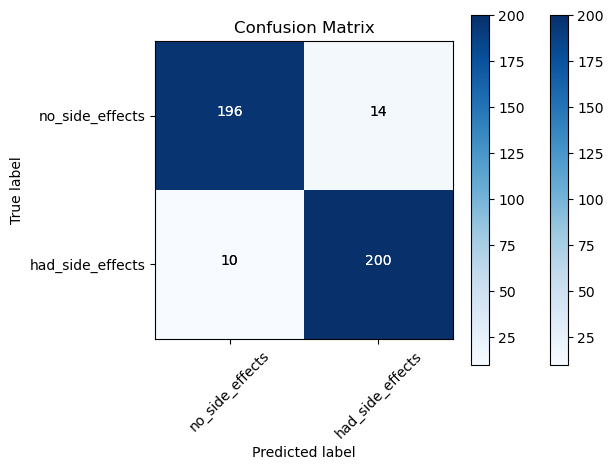

In [55]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(
    y_true=test_labels, 
    y_pred=rounded_predictions, 
    classes=cm_plot_labels, 
    title='Confusion Matrix'
)


### 📊 Confusion Matrix Explanation

The confusion matrix compares the **actual labels** with the **model's predictions**.  
Here is the result:

|                | Predicted: no_side_effects | Predicted: had_side_effects |
|----------------|-----------------------------|------------------------------|
| **Actual: no_side_effects** | 196 (True Negatives)       | 14 (False Positives)        |
| **Actual: had_side_effects** | 10 (False Negatives)       | 200 (True Positives)        |

---

### ✅ How to Read This Matrix
- **True Negatives (TN = 196):**  
  The model correctly predicted "no side effects".
  
- **False Positives (FP = 14):**  
  The model incorrectly predicted "had side effects" when the person had none. (Type I error)

- **False Negatives (FN = 10):**  
  The model incorrectly predicted "no side effects" when the person actually had them. (Type II error)

- **True Positives (TP = 200):**  
  The model correctly predicted "had side effects".

---

### 📈 Metrics from this Matrix
- **Accuracy** = (TP + TN) / Total  
  = (200 + 196) / (196 + 14 + 10 + 200)  
  = 396 / 420 ≈ **94.3%**

- **Precision (for 'had side effects')** = TP / (TP + FP)  
  = 200 / (200 + 14) ≈ **93.5%**

- **Recall (Sensitivity)** = TP / (TP + FN)  
  = 200 / (200 + 10) ≈ **95.2%**

- **F1-Score** = 2 × (Precision × Recall) / (Precision + Recall)  
  ≈ **94.3%**

---

### 🔑 Summary
The model performs very well:
- High accuracy (~94%)  
- Very few false predictions (14 FP, 10 FN)  
- Balanced precision and recall → good for real-world predictions.


how to save the model
**1 model.save()**

In [21]:
#checck if already exists
# if not,  the model is saved to disks

import os.path
if os.path.isfile('models/medical_trail_model.h5') is False:
    model.save('models/medical_trail_model.h5')

this save functions saves:
• The architecture of the model, allowing to re-create the model.
• The weights of the model.
• The training configuration (loss, optimizer).
• The state of the optimizer, allowing to resume training exactly where you left off.

In [22]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'models/medical_trial_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)